In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.signal import get_window
from smstools.models import utilFunctions as UF
from smstools.models import hpsModel as HPS

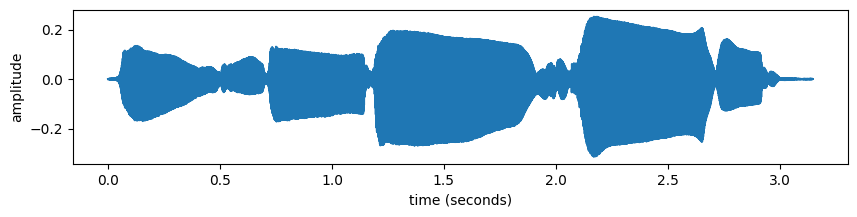

In [2]:
inputFile = '../sounds/sax-phrase-short.wav'
fs, x = UF.wavread(inputFile)
plt.figure(0, figsize=(10, 2))
time_indexes = np.linspace(0, x.size/fs, x.size)
plt.plot(time_indexes, x)
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.show()
ipd.display(ipd.Audio(data=x, rate=fs))

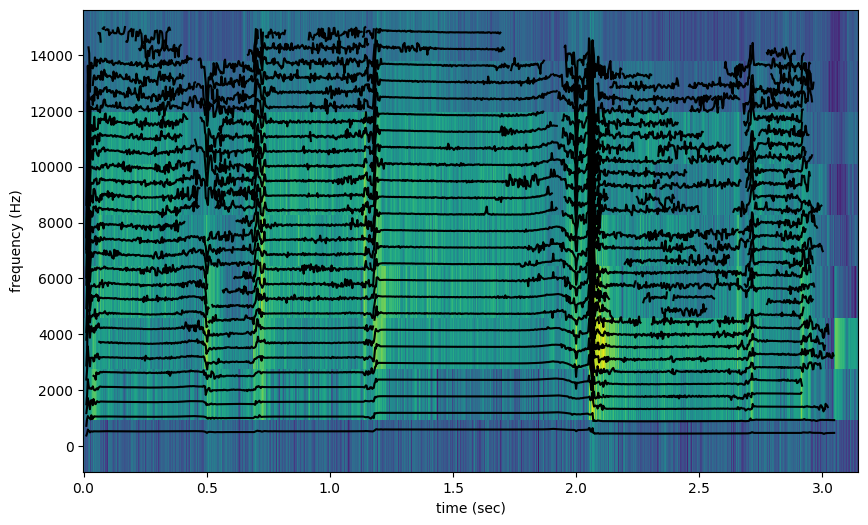

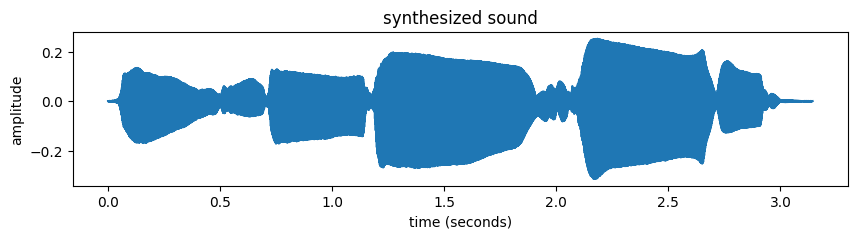

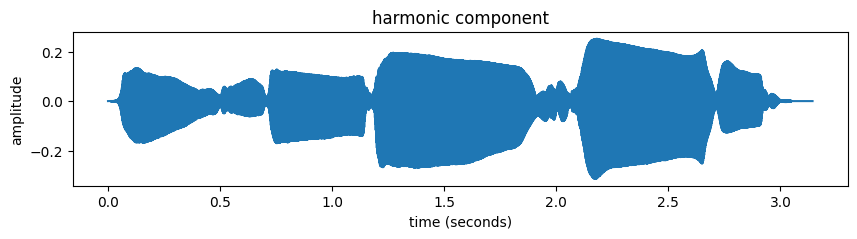

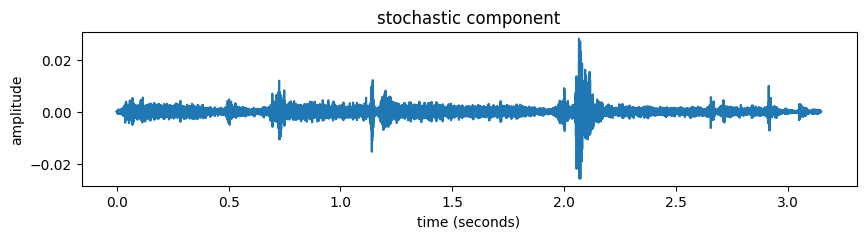

In [5]:
window="blackman"
M=601
N=1024
t=-100
minSineDur=0.1
nH=100
minf0=350
maxf0=700
f0et=5
harmDevSlope=0.01
stocf=0.1

Ns = 512
# hop size (has to be 1/4 of Ns)
H = 128

w = get_window(window, M)
hfreq, hmag, hphase, stocEnv = HPS.hpsModelAnal(x, fs, w, N, H, t, nH, minf0, maxf0, f0et, harmDevSlope, minSineDur, Ns, stocf)
y, yh, yst = HPS.hpsModelSynth(hfreq, hmag, hphase, stocEnv, Ns, H, fs)

plt.figure(figsize=(10, 6))
maxplotfreq = 15000.0

# plot the stochastic spectrogram
numFrames = int(stocEnv[:, 0].size)
sizeEnv = int(stocEnv[0, :].size)
frmTime = H * np.arange(numFrames) / float(fs)
binFreq = (0.5 * fs) * np.arange(sizeEnv * maxplotfreq / (0.5 * fs)) / sizeEnv
plt.pcolormesh(frmTime, binFreq, np.transpose(stocEnv[:, : int(sizeEnv * maxplotfreq / (0.5 * fs) + 1)]))
plt.autoscale(tight=True)

# plot harmonic on top of stochastic spectrogram
harms = hfreq * np.less(hfreq, maxplotfreq)
harms[harms == 0] = np.nan
numFrames = harms.shape[0]
frmTime = H * np.arange(numFrames) / float(fs)
plt.plot(frmTime, harms, color="k", ms=3, alpha=1)
plt.xlabel("time (sec)")
plt.ylabel("frequency (Hz)")
plt.autoscale(tight=True)
plt.show()

# plot the output sound
plt.figure(0, figsize=(10, 2))
time_indexes = np.linspace(0, y.size/fs, y.size)
plt.plot(time_indexes, y)
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.title("synthesized sound")
plt.show()
ipd.display(ipd.Audio(data=y, rate=fs))

# plot the harmonic component
plt.figure(0, figsize=(10, 2))
time_indexes = np.linspace(0, yh.size/fs, yh.size)
plt.plot(time_indexes, yh)
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.title("harmonic component")
plt.show()
ipd.display(ipd.Audio(data=yh, rate=fs))

# plot the stochastic sound
plt.figure(0, figsize=(10, 2))
time_indexes = np.linspace(0, yst.size/fs, yst.size)
plt.plot(time_indexes, yst)
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.title("stochastic component")
plt.show()
ipd.display(ipd.Audio(data=yst, rate=fs))